In [1]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [37]:

def EightBitsToNBits(adc, N):
    return bin(int((adc * ((2**N) -1)) / 255.0))[2:].zfill(N)
def imgToMemoryFile(fileName='m2.jpg', WH={'W': 240, 'H': 120}, RGBFormat=0):
    # /*
    # RGBFormat
    # 0 - 16bit (5-6-5)
    # 1 - 8bit (grayscale)
    # 2 - 24bit (8-8-8)
    # */
    img = plt.imread(fileName)
    img = cv2.resize(img, (WH['W'], WH['H']))
    if img.max() == 1.0: # in case of png
        img = img*255
        img = img.astype(np.uint8)

    if RGBFormat == 0:
        EightBitsToNBits_V = np.vectorize(EightBitsToNBits)
        r = EightBitsToNBits_V(img[:, :, 0], 5).reshape(-1, 1)
        g = EightBitsToNBits_V(img[:, :, 1], 6).reshape(-1, 1)
        b = EightBitsToNBits_V(img[:, :, 2], 5).reshape(-1, 1)
        st = ''
        wt = ''
        for i in range(r.shape[0]):
            st = st + hex(int(r[i][0]+g[i][0]+b[i][0], 2))[2:] + ',\n'
            wt = wt + hex(int(r[i][0]+g[i][0]+b[i][0], 2))[2:] + '\n'
    elif RGBFormat == 1:
        grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grayImg = grayImg.reshape(-1, 1)

        st = ''
        wt = ''
        for i in range(grayImg.shape[0]):
            st = st + hex(grayImg[i][0])[2:] + ',\n'
            wt = wt + hex(grayImg[i][0])[2:] + '\n'

    elif RGBFormat == 2:
        r = img[:, :, 0].reshape(-1, 1)
        g = img[:, :, 1].reshape(-1, 1)
        b = img[:, :, 2].reshape(-1, 1)
        st = ''
        wt = ''
        for i in range(r.shape[0]):
            st = st + hex(r[i][0])[2:].zfill(2)+hex(g[i][0])[2:].zfill(2)+hex(b[i][0])[2:].zfill(2) + ',\n'
            wt = wt + hex(r[i][0])[2:].zfill(2)+hex(g[i][0])[2:].zfill(2)+hex(b[i][0])[2:].zfill(2) + '\n'

    with open('./ImageMemoryFile/MemoryFile.coe', 'w+') as f:
        f.write('memory_initialization_radix=16;\nmemory_initialization_vector=\n')
        f.write(st[:-2]+';')
        f.close()
    with open('./ImageMemoryFile/MemoryFile.mem', 'w+') as f:
        f.write(wt[:-1])
        f.close()

In [38]:
def SixteenbitRGBtoSeperateRGB(a):
    rgb = bin(int(a, 16))[2:].zfill(16)
    r, g, b = int(rgb[0:4], 2)*255.0/31.0, int(rgb[5:10], 2) * \
        255.0/63.0, int(rgb[11:15], 2)*255.0/31.0
    return np.asarray([r, g, b])

def MemoryFileToImg(fileName, WH={'W': 240, 'H': 120}, RGBMode=0):
    lisa = None
    with open(fileName) as fil:
        lisa = list(map(lambda x: x.strip()[:-1], fil.readlines()))
        fil.close()
    lisa = np.asarray(lisa[2:])

    if RGBMode == 0:
        dummyImg = np.zeros((WH['H'], WH['W'], 3))

        for j in range(WH['H']):
            for i in range(WH['W']):
                addr = (j*WH['W']) + i
                ghost = SixteenbitRGBtoSeperateRGB(lisa[addr])
                dummyImg[j, i] = ghost
        dummyImg = np.asarray(dummyImg, dtype=np.uint8)

        plt.imshow(dummyImg)
        plt.show()
    elif RGBMode == 1:
        dummyImg = np.zeros((WH['H'], WH['W']))

        for j in range(WH['H']):
            for i in range(WH['W']):
                addr = (j*WH['W']) + i
                ghost = lisa[addr]
                dummyImg[j, i] = int('0x'+ghost, 16)
        dummyImg = np.asarray(dummyImg, dtype=np.uint8)

        plt.imshow(dummyImg, cmap='gray')
        plt.show()

    elif RGBMode == 2:
        dummyImg = np.zeros((WH['H'], WH['W'], 3))

        for j in range(WH['H']):
            for i in range(WH['W']):
                addr = (j*WH['W']) + i
                ghost = np.asarray(
                    [int('0x'+lisa[addr][0:2], 16), int('0x'+lisa[addr][2:4], 16), int('0x'+lisa[addr][4:6], 16)])
                # print(ghost)
                dummyImg[j, i] = ghost
        dummyImg = np.asarray(dummyImg, dtype=np.uint8)

        plt.imshow(dummyImg)
        plt.show()


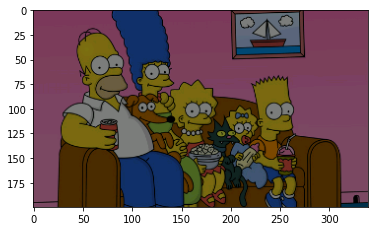

In [43]:
RGBFormat = 0
WH = {'W': 320, 'H': 180}
imgToMemoryFile('Simpson640x360.png', WH, RGBFormat=RGBFormat)
MemoryFileToImg('./ImageMemoryFile/MemoryFile.coe', WH, RGBMode=RGBFormat)